# Exercise 6.1 Sourcing Open Data

## Contents:

    0. Import Libraries

    1. Loading and Checking the Data

    2. Initial Data Exploration

    3. Checking for Missing Values

    4. Checking for duplicates, mixed-type data, and performing data transformations

    5. Addressing errors and inconsistencies

    6. Checking the Outliers

    7. Exporting the Dataset

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading and Checking the Data

In [2]:
# Define the path to the data files
path = '/Users/aaronkibler/CF Project 6'

In [3]:
# Load the dataset on COVID-19 deaths and contributing conditions as "df_covid"
df_covid = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

In [4]:
# Checking the dataset is correctly loaded
print(df_covid.head())
print(df_covid.info())
df_covid.shape

   Data As Of Start Date    End Date     Group  Year  Month          State  \
0  09/24/2023   01.01.20  09/23/2023  By Total   NaN    NaN  United States   
1  09/24/2023   01.01.20  09/23/2023  By Total   NaN    NaN  United States   
2  09/24/2023   01.01.20  09/23/2023  By Total   NaN    NaN  United States   
3  09/24/2023   01.01.20  09/23/2023  By Total   NaN    NaN  United States   
4  09/24/2023   01.01.20  09/23/2023  By Total   NaN    NaN  United States   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18     25-34   
2  Respiratory diseases  Influenza and pneumonia     J09-J18     35-44   
3  Respiratory diseases  Influenza and pneumonia     J09-J18     45-54   
4  Respiratory diseases  Influenza and pneumonia     J09-J18     55-64   

   COVID-19 Deaths  Number of Mentions Flag  
0           1569.0              1647.0  

(621000, 14)

# 2. Initial Data Exploration

### From the initial inspection of the dataset, there is are categorical variables, numerical variables, and data variables:

### Categorical Variables:
### State
### Condition Group
### Condition
### ICD10_codes
### Age Group
### Flag

### Numerical Variables:
### Year
### Month
### COVID-19 Deaths
### Number of Mentions

### Date Variables:
### Data As Of
### Start Date
### End Date

### Let's start by checking the basic statistics of the numerical variables.

In [5]:
# Check basic statistics of the dataset
df_covid.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,608580.000000,558900.000000,4.375510e+05,4.434230e+05
mean,2021.408163,6.200000,1.201179e+02,1.293348e+02
std,1.086436,3.350625,2.980201e+03,3.203936e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.800000e+01,1.900000e+01
max,2023.000000,12.000000,1.146242e+06,1.146242e+06


### Year and Month distributions are as expected with the years ranging from 2020 to 2023 and months from 1 (January) to 12 (December).
### COVID-19 Deaths and Number of Mentions have a large number of zeroes (median is 0) and high maximum values.
### There appears to be a high degree of variability in the COVID-19 Deaths and Number of Mentions columns.

### I will check histograms and box plots of the numerical variables to get a better impression of the data.

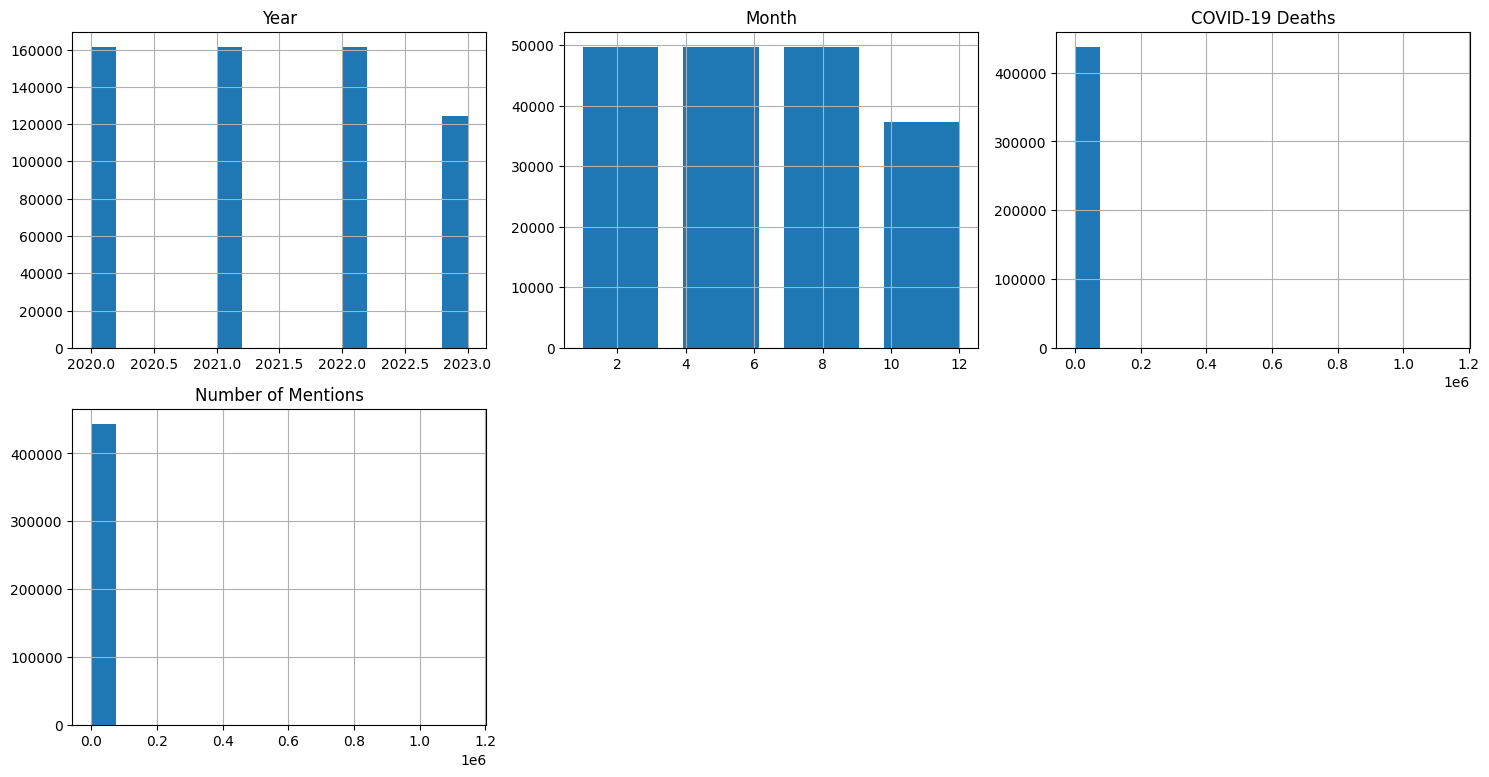

In [6]:
# Plot histograms for all numerical columns
df_covid.hist(bins=15, figsize=(15, 15), layout=(4, 3))
plt.tight_layout()
plt.show()

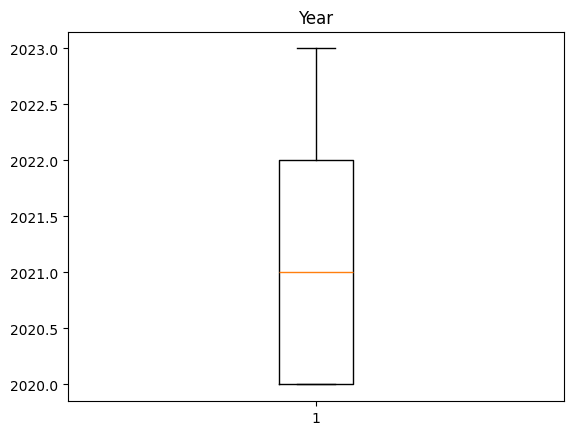

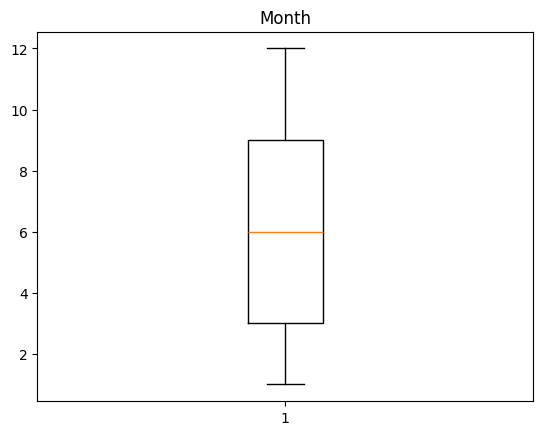

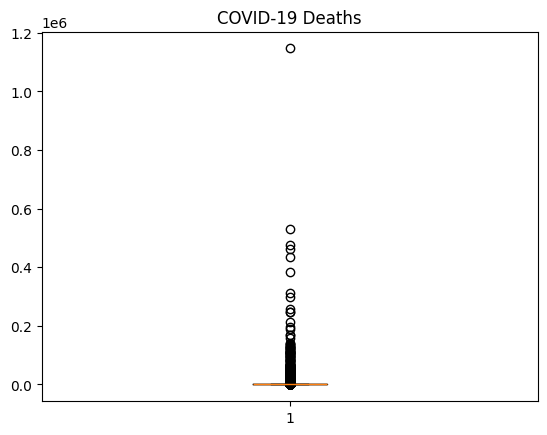

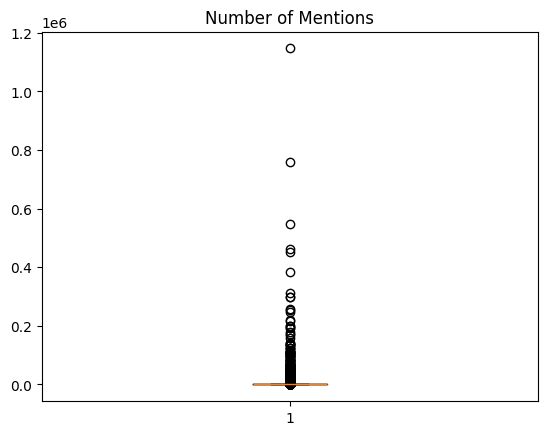

In [7]:
# Creating box plots for the numerical variables:
plt.boxplot(df_covid['Year'].dropna())
plt.title('Year')
plt.show()

plt.boxplot(df_covid['Month'].dropna())
plt.title('Month')
plt.show()

plt.boxplot(df_covid['COVID-19 Deaths'].dropna())
plt.title('COVID-19 Deaths')
plt.show()

plt.boxplot(df_covid['Number of Mentions'].dropna())
plt.title('Number of Mentions')
plt.show()

### Both COVID-19 Deaths and Number of Mentions are highly right-skewed with a high number of outliers.
### The Year and Month distributions appear pretty much as expected.

### I will now check frequency counts for the categorical variables

In [8]:
# Perform frequency counts on the categorical variables
print(df_covid['State'].value_counts(dropna=False))

print(df_covid['Condition Group'].value_counts(dropna=False))

print(df_covid['Condition'].value_counts(dropna=False))

print(df_covid['ICD10_codes'].value_counts(dropna=False))

print(df_covid['Age Group'].value_counts(dropna=False))

print(df_covid['Flag'].value_counts(dropna=False))

State
United States           11500
Pennsylvania            11500
Nevada                  11500
New Hampshire           11500
New Jersey              11500
New Mexico              11500
New York                11500
New York City           11500
North Carolina          11500
North Dakota            11500
Ohio                    11500
Oklahoma                11500
Oregon                  11500
Rhode Island            11500
Alabama                 11500
South Carolina          11500
South Dakota            11500
Tennessee               11500
Texas                   11500
Utah                    11500
Vermont                 11500
Virginia                11500
Washington              11500
West Virginia           11500
Wisconsin               11500
Wyoming                 11500
Nebraska                11500
Montana                 11500
Missouri                11500
Mississippi             11500
Alaska                  11500
Arizona                 11500
Arkansas                11500
Cali

### It looks like distribution of records is very uniform across states, condition groups, conditions, ICD10 codes, and age groups. The Flag column contains mostly missing values, which is good because the flag indicates data was suppressed for confidentiality.

# 3. Checking for missing values

In [9]:
# Check the data for missing values
df_covid.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

### Year: 12,420
### Month: 62,100
### COVID-19 Deaths: 183,449
### Number of Mentions: 177,577
### Flag: 437,551

### Taking a closer look at the rows with missing values in the Year column, these are all part of the Group "By Total", indicating that the Year column is empty because the row represents an aggregation.

### The missing values in the Month column also correspond to then the Group column is either "By Total" or "By Year", again indicating these rows represent aggregated data.

### Removing these rows of aggregated data will address the missing values in both the Year and Month columns, as well as provide more accurate descriptive statistics of the dataset.

In [10]:
# Separate the dataframe into two parts, one that includes Group only "By Month" and one that includes Group "By Total" and "By Year"
df_covid_month = df_covid[df_covid['Group'] == 'By Month']
df_covid_total_year = df_covid[df_covid['Group'].isin(['By Total', 'By Year'])]

In [11]:
# Verify the separation
df_covid_month.info()
df_covid_total_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558900 entries, 62100 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          558900 non-null  object 
 1   Start Date          558900 non-null  object 
 2   End Date            558900 non-null  object 
 3   Group               558900 non-null  object 
 4   Year                558900 non-null  float64
 5   Month               558900 non-null  float64
 6   State               558900 non-null  object 
 7   Condition Group     558900 non-null  object 
 8   Condition           558900 non-null  object 
 9   ICD10_codes         558900 non-null  object 
 10  Age Group           558900 non-null  object 
 11  COVID-19 Deaths     388500 non-null  float64
 12  Number of Mentions  393720 non-null  float64
 13  Flag                170400 non-null  object 
dtypes: float64(4), object(10)
memory usage: 64.0+ MB
<class 'pandas.core.frame.DataFrame'

In [12]:
# Check the total rows add up correctly
len(df_covid)

621000

In [13]:
len(df_covid_month) + len(df_covid_total_year)

621000

### Recheck the number of missing values in the separated "df_covid_month" dataframe

In [14]:
# Check for missing values
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       170400
Number of Mentions    165180
Flag                  388500
dtype: int64

### The missing values in the COVID-19 Deaths and Number of Mentions columns appear to correspond with the Flag column value of "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
### Therefore, I will impute a random number between 1 and 9 into the missing values of COVID-19 Deaths and Number of Mentions when the flag indicator is present.

In [15]:
# Define a function to generate random integers between 1 and 9
def random_1_to_9(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)

In [16]:
# Identify rows with suppression flag
suppression_message = "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
suppressed_rows = df_covid_month[df_covid_month['Flag'] == suppression_message]

In [17]:
# Impute only the missing values in COVID-19 Deaths and Number of Mentions with a random number between 1-9
df_covid_month.loc[suppressed_rows.index, 'COVID-19 Deaths'] = random_1_to_9(suppressed_rows['COVID-19 Deaths'])
df_covid_month.loc[suppressed_rows.index, 'Number of Mentions'] = random_1_to_9(suppressed_rows['Number of Mentions'])

### Verify the changes by comparing the number of cells with values between 1 and 9 to the number of missing values in each column before imputation.

In [18]:
# Verify the changes by rechecking the descriptive statistics
df_covid_month.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,558900.000000,558900.000000,558900.000000,558900.000000
mean,2021.400000,6.200000,32.241040,35.050746
std,1.083206,3.350625,483.282448,518.791721
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,8.000000,8.000000
max,2023.000000,12.000000,105566.000000,105566.000000


In [19]:
# Verify the changes by checking value counts
print(df_covid_month['COVID-19 Deaths'].value_counts().sort_index())
print(df_covid_month['Number of Mentions'].value_counts().sort_index())

COVID-19 Deaths
0.0         275134
1.0          19333
2.0          19102
3.0          19231
4.0          19012
             ...  
63446.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2726, dtype: int64
Number of Mentions
0.0         275134
1.0          18858
2.0          18553
3.0          18383
4.0          18500
             ...  
65364.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2875, dtype: int64


In [20]:
# Recheck for missing values in the dataframe
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths            0
Number of Mentions         0
Flag                  388500
dtype: int64

### The only missing values remaining are in the Flag column and are expected, so no further action is necessary.

# 4. Checking for duplicates, mixed-type data, and  performing data transformations

In [21]:
# Check for duplicate rows in the dataset
df_covid_month.duplicated().sum()

0

In [22]:
# Check for any mixed-type columns
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


In [23]:
# Check the data-types of the dataframe
print(df_covid_month.dtypes)

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object


In [24]:
# Convert date columns to datetime
df_covid_month['Data As Of'] = pd.to_datetime(df_covid_month['Data As Of'])
df_covid_month['Start Date'] = pd.to_datetime(df_covid_month['Start Date'])
df_covid_month['End Date'] = pd.to_datetime(df_covid_month['End Date'])

/var/folders/8v/8dnlfm0j7s1fk_kl60996mgw0000gn/T/ipykernel_4873/2103694846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month['Data As Of'] = pd.to_datetime(df_covid_month['Data As Of'])
/var/folders/8v/8dnlfm0j7s1fk_kl60996mgw0000gn/T/ipykernel_4873/2103694846.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_covid_month['Start Date'] = pd.to_datetime(df_covid_month['Start Date'])
/var/folders/8v/8dnlfm0j7s1fk_kl60996mgw0000gn/T/ipykernel_4873/2103694846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [25]:
# Convert categorical columns to category type for improved memory efficiency
categorical_columns = ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']
for column in categorical_columns:
    df_covid_month[column] = df_covid_month[column].astype('category')

/var/folders/8v/8dnlfm0j7s1fk_kl60996mgw0000gn/T/ipykernel_4873/3170617917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month[column] = df_covid_month[column].astype('category')
/var/folders/8v/8dnlfm0j7s1fk_kl60996mgw0000gn/T/ipykernel_4873/3170617917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month[column] = df_covid_month[column].astype('category')
/var/folders/8v/8dnlfm0j7s1fk_kl60996mgw0000gn/T/ipykernel_4873/3170617917.py:4: SettingWithCopyWarning: 
A value is trying 

In [26]:
# Recheck for mixed-type data
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


In [27]:
# Recheck the data-types
print(df_covid_month.dtypes)

Data As Of            datetime64[ns]
Start Date            datetime64[ns]
End Date              datetime64[ns]
Group                         object
Year                         float64
Month                        float64
State                       category
Condition Group             category
Condition                   category
ICD10_codes                 category
Age Group                   category
COVID-19 Deaths              float64
Number of Mentions           float64
Flag                        category
dtype: object


In [28]:
# Drop the Group column as it only contains "By Month" and is no longer necessary for sorting/filtering
df_covid_month = df_covid_month.drop(columns=['Group'])

In [29]:
# Verify the changes
print(df_covid_month.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')


# 5. Addressing errors and inconsistencies

### Check the data for inconsistencies by reviewing the unique values of categorical columns and the basic statistics of numerical columns.

In [30]:
# Unique values for categorical columns
unique_covid = {col: df_covid_month[col].unique() for col in ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 54
Unique values:
  - United States
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming
  - Puerto Rico

Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer d

### The State column will now be cleaned up by removing the aggregated rows under the "United States" entry.
### New York City data is excluded from the New York state data, so NYC rows will be retained in the dataframe.
### Puerto Rico will be removed from the dataframe so that the analysis can focus on the US States.
### District of Columbia will be kept in the dataframe for now.

In [31]:
# Filter out rows where State is "United States", "New York City", or "Puerto Rico"
df_covid_states = df_covid_month[~df_covid_month['State'].isin(['United States', 'Puerto Rico'])]

### The Age Group "All Ages" represents aggregated data and those rows will be removed consistent with the removal of other aggregated data rows in the dataframe.

In [32]:
# Remove rows where Age Group is "All Ages"
df_covid_cleaned = df_covid_states[df_covid_states['Age Group'] != 'All Ages']

### Closer inspection of the "Not stated" entry in the Age Group column shows that these rows always have zero COVID-19 Deaths and zero Number of Mentions.
### Given that rows with Age Group of "Not stated" have no associated deaths or mentions, these rows do not contribute meaningful information to the analysis and will be removed.

In [33]:
# Remove rows where Age Group is "Not stated"
df_covid_final_cleaned = df_covid_cleaned[df_covid_cleaned['Age Group'] != 'Not stated']

In [34]:
# Recheck the unique values for categorical columns
unique_covid_cleaned = {col: df_covid_final_cleaned[col].unique() for col in ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']}
for col, values in unique_covid_cleaned.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 52
Unique values:
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming

Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer disease
  - Vascular and unspecifie

### Moving on now to checking statistics of the numerical columns

In [35]:
# Statistical summaries for numerical columns
df_covid_final_cleaned[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']].describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560.000000,430560.000000,430560.000000,430560.000000
mean,2021.400000,6.200000,10.909627,11.777160
std,1.083206,3.350626,53.958721,57.091007
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,7.000000,8.000000
max,2023.000000,12.000000,5094.000000,5094.000000


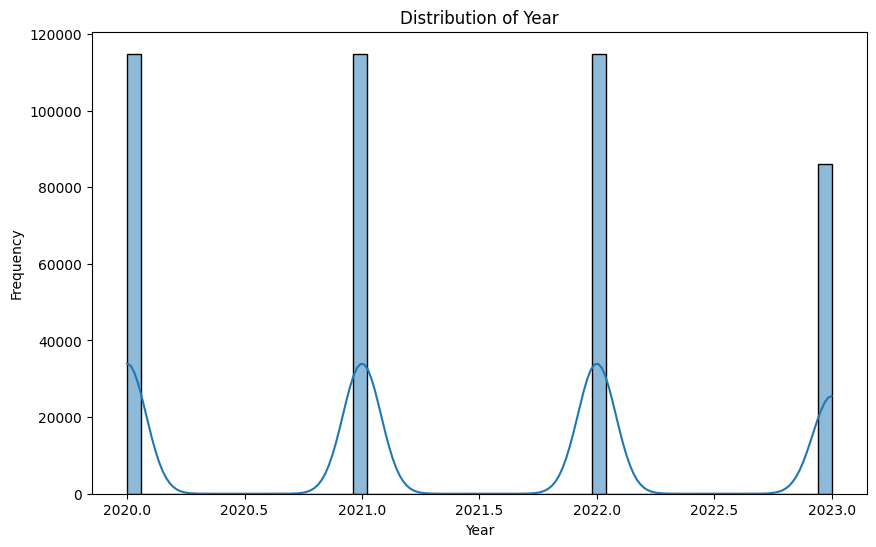

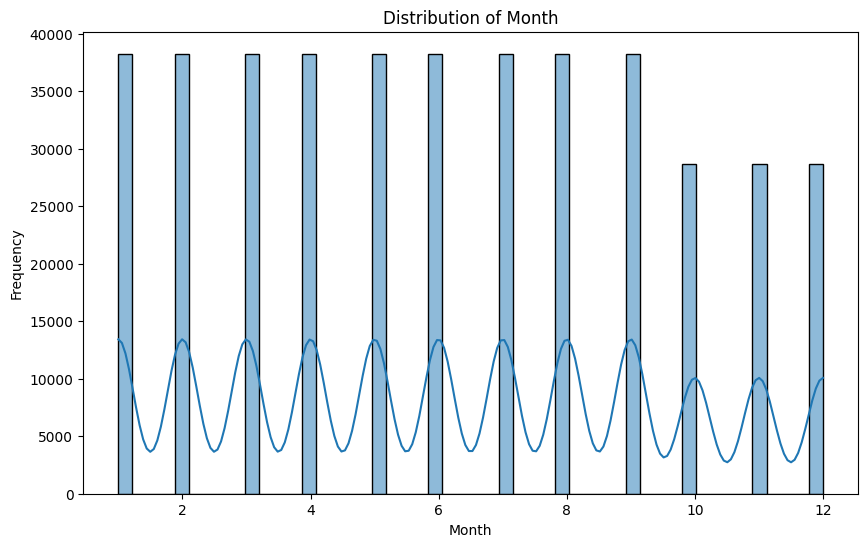

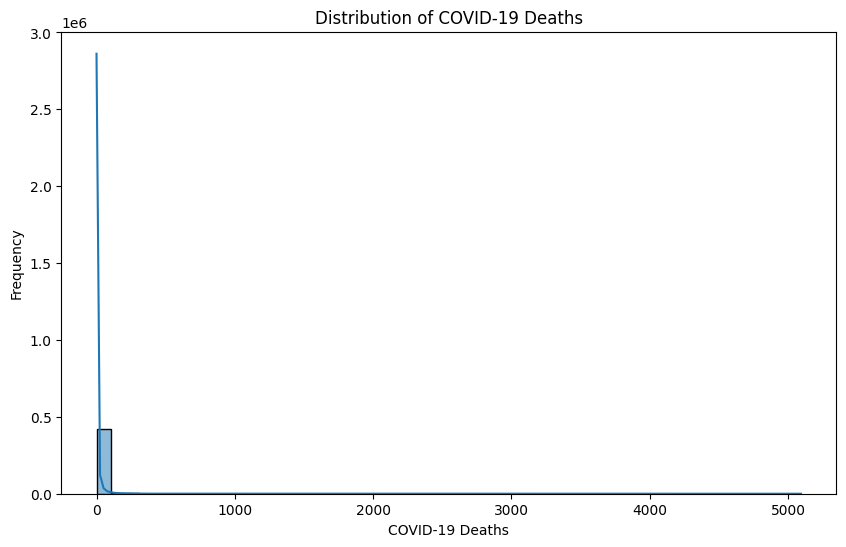

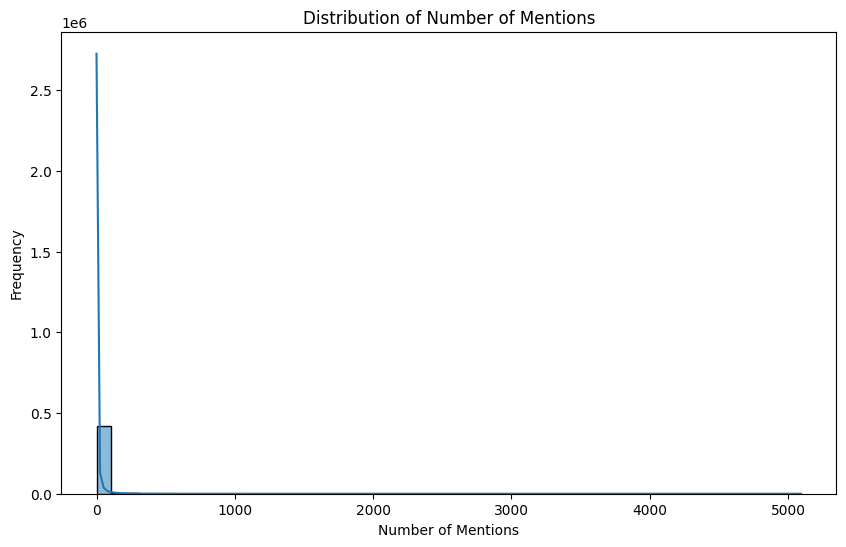

In [36]:
# Distribution plots for numerical columns
numerical_columns = ['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_covid_final_cleaned[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Summary Statistics:
### Year and Month: Data spans from 2020 to 2023. All months from January (1) to December (12) are represented except in 2023 where data collection ended in September (9).
### COVID-19 Deaths and Number of Mentions: Mean values are relatively low compared to the maximum values. Both columns have a high standard deviation, indicating significant variability. The median value for both columns is 1, indicating that at least half of the entries have non-zero values.

### Visual Inspection:
### Year and Month: Data appears as expected across all years and months, with lower frequencies in the last few months of 2023 due to the cessation of data collection.
### COVID-19 Deaths and Number of Mentions: Highly skewed distributions towards zero.

# 6. Checking the Outliers

### Check all numerical columns for outliers according to the IQR method.

In [37]:
# First, define a function to identify outliers in numerical columns according to the IQR
def find_column_outliers_IQR(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return df.loc[outlier_indices]

### The function can now be used to check for outliers in the numerical variables:

In [38]:
# Check for outliers in Year
year_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Year')
year_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


### No outliers found by IQR method in the "Year" column

In [39]:
# Check for outliers in "Month"
month_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Month')
month_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


### No outliers found by IQR method in the "Month" column

In [40]:
# Check for outliers in "COVID-19 Deaths"
covid_deaths_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'COVID-19 Deaths')
covid_deaths_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,NaN
72552,2023-09-24,2021-01-01,2021-01-31,2021.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,18.0,18.0,NaN
72559,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,NaN
72560,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,NaN
72561,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610534,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Wyoming,COVID-19,COVID-19,U071,85+,20.0,20.0,NaN
610535,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,NaN
610536,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,NaN
610537,2023-09-24,2021-11-01,2021-11-30,2021.0,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,NaN


### A significant number of outliers are identified, likely because of the high number of zeros in the data. However, the values appear reasonable in context and should be retained in the dataframe.

In [41]:
# Check for outliers in "Number of Mentions"
mentions_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Number of Mentions')
mentions_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,NaN
72559,2023-09-24,2021-08-01,2021-08-31,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,NaN
72560,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,NaN
72561,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,NaN
72596,2023-09-24,2020-12-01,2020-12-31,2020.0,12.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,29.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610527,2023-09-24,2021-01-01,2021-01-31,2021.0,1.0,Wyoming,COVID-19,COVID-19,U071,85+,33.0,33.0,NaN
610535,2023-09-24,2021-09-01,2021-09-30,2021.0,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,NaN
610536,2023-09-24,2021-10-01,2021-10-31,2021.0,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,NaN
610537,2023-09-24,2021-11-01,2021-11-30,2021.0,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,NaN


### Similar to the COVID-19 Deaths column, the Number of Mentions column also has a significant number of outliers. Again, this is likely due to the high number of zeros in the data. The values appear reasonable in context and should, therefore, be retained in the dataframe.

# 7. Exporting the Dataset

### Final check of the dataframe before exporting

In [42]:
# Final check of the "df_covid_final_cleaned" dataframe before exporting
print(df_covid_final_cleaned.head())
print(df_covid_final_cleaned.info())
df_covid_final_cleaned.shape

      Data As Of Start Date   End Date    Year  Month    State  \
72450 2023-09-24 2020-01-01 2020-01-31  2020.0    1.0  Alabama   
72451 2023-09-24 2020-02-01 2020-02-29  2020.0    2.0  Alabama   
72452 2023-09-24 2020-03-01 2020-03-31  2020.0    3.0  Alabama   
72453 2023-09-24 2020-04-01 2020-04-30  2020.0    4.0  Alabama   
72454 2023-09-24 2020-05-01 2020-05-31  2020.0    5.0  Alabama   

            Condition Group                Condition ICD10_codes Age Group  \
72450  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72451  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72452  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72453  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
72454  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

       COVID-19 Deaths  Number of Mentions Flag  
72450              0.0                 0.0  NaN  
72451              0.0            

(430560, 13)

In [43]:
# Recheck statistics of the dataset
df_covid_final_cleaned.describe()

,Data As Of,Start Date,End Date,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560,430560,430560,430560.000000,430560.000000,430560.000000,430560.000000
mean,2023-09-24 00:00:00,2021-10-31 07:28:00.000001024,2021-11-29 13:52:00,2021.400000,6.200000,10.909627,11.777160
min,2023-09-24 00:00:00,2020-01-01 00:00:00,2020-01-31 00:00:00,2020.000000,1.000000,0.000000,0.000000
25%,2023-09-24 00:00:00,2020-12-01 00:00:00,2020-12-31 00:00:00,2020.000000,3.000000,0.000000,0.000000
50%,2023-09-24 00:00:00,2021-11-01 00:00:00,2021-11-30 00:00:00,2021.000000,6.000000,1.000000,1.000000
75%,2023-09-24 00:00:00,2022-10-01 00:00:00,2022-10-31 00:00:00,2022.000000,9.000000,7.000000,8.000000
max,2023-09-24 00:00:00,2023-09-01 00:00:00,2023-09-23 00:00:00,2023.000000,12.000000,5094.000000,5094.000000
std,NaN,NaN,NaN,1.083206,3.350626,53.958721,57.091007


In [44]:
# Check counts of unique values in categorical variables
print(df_covid_final_cleaned['State'].value_counts(dropna=False))

State
Alabama                 8280
Montana                 8280
Nevada                  8280
New Hampshire           8280
New Jersey              8280
New Mexico              8280
New York                8280
New York City           8280
North Carolina          8280
North Dakota            8280
Ohio                    8280
Oklahoma                8280
Oregon                  8280
Pennsylvania            8280
Rhode Island            8280
South Carolina          8280
South Dakota            8280
Tennessee               8280
Texas                   8280
Utah                    8280
Vermont                 8280
Virginia                8280
Washington              8280
West Virginia           8280
Wisconsin               8280
Alaska                  8280
Nebraska                8280
Missouri                8280
Mississippi             8280
Arizona                 8280
Arkansas                8280
California              8280
Colorado                8280
Connecticut             8280
Delaware

In [45]:
print(df_covid_final_cleaned['Condition Group'].value_counts(dropna=False))

Condition Group
Circulatory diseases                                                         131040
Respiratory diseases                                                         112320
All other conditions and causes (residual)                                    18720
Alzheimer disease                                                             18720
COVID-19                                                                      18720
Diabetes                                                                      18720
Intentional and unintentional injury, poisoning, and other adverse events     18720
Malignant neoplasms                                                           18720
Obesity                                                                       18720
Renal failure                                                                 18720
Sepsis                                                                        18720
Vascular and unspecified dementia                           

In [46]:
print(df_covid_final_cleaned['Condition'].value_counts(dropna=False))

Condition
Adult respiratory distress syndrome                                          18720
Intentional and unintentional injury, poisoning, and other adverse events    18720
Sepsis                                                                       18720
Respiratory failure                                                          18720
Respiratory arrest                                                           18720
Renal failure                                                                18720
Other diseases of the respiratory system                                     18720
Other diseases of the circulatory system                                     18720
Obesity                                                                      18720
Malignant neoplasms                                                          18720
Ischemic heart disease                                                       18720
Influenza and pneumonia                                                      

In [47]:
print(df_covid_final_cleaned['ICD10_codes'].value_counts(dropna=False))

ICD10_codes
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99    18720
I50                                                                                                                                                                                     18720
S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03                                                                                                                           18720
R09.2                                                                                                                                                                                   18720
N17-N19                                                                                                                                                                                 18720
J96                                   

In [48]:
print(df_covid_final_cleaned['Age Group'].value_counts(dropna=False))

Age Group
0-24          53820
25-34         53820
35-44         53820
45-54         53820
55-64         53820
65-74         53820
75-84         53820
85+           53820
All Ages          0
Not stated        0
Name: count, dtype: int64


In [49]:
print(df_covid_final_cleaned['Flag'].value_counts(dropna=False))

Flag
NaN                                                                                                                           279731
One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    150829
Name: count, dtype: int64


### Export the final cleaned dataset as a CSV file

In [50]:
# Export the "df_covid_final_cleaned" dataframe to CSV
df_covid_final_cleaned.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index=False)

# End